<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_19_MCF7_vs_MDA-MB231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [43]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


# **Let's load the data from Grand Database. df_gene_expression is taken from CCLE expression within sample file, where I chose ACH-000019 (MCF7) and ACH000768 (MDA-MB231)**

df_MCF7_Tf_genes is a matrix for MCF7 cells consisting of TF-gene interaction with edge weights

df_MDA_MB231_TF_genes is a matrix for MDA_MB231 cells with TF-gene interaction with edge weights


In [45]:
#let's read the MCF7_TF_Genes dataset and make changes
df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)
df_MDA_MB231_TF_Genes=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000768.csv', index_col=0)
df_gene_expression=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/CCLE_expression_withinSample.csv', index_col=0)
#

In [46]:
#let's do initial data assessment
#df_MCF7_TF_Genes.head()


In [47]:
#df_MDA_MB231_TF_Genes.head()

In [48]:
df_gene_expression.head()
#df_gene_expression.info()

ACH-001113  ACH-001289  ACH-001339  ACH-001538  ACH-000242  \
TSPAN6     11.676455   11.830119   10.843368   12.652100   14.215396   
TNMD        7.801777    8.192801    7.801777    7.801777    7.801777   
DPM1       12.579853   12.379945   12.929608   12.744038   12.058332   
SCYL3      10.607789   10.110254   10.204371   10.582597   10.357270   
C1orf112   11.125686   10.520779   11.410654   10.098584   10.676832   

          ACH-000708  ACH-000327  ACH-000233  ACH-000461  ACH-000705  ...  \
TSPAN6     11.836555   11.584980    8.070704   11.658064   11.884942  ...   
TNMD        8.012218    7.801777    7.801777    7.801777    7.801777  ...   
DPM1       12.615618   12.149958   11.622506   12.156075   11.922925  ...   
SCYL3      10.495712   10.257913   11.515329   10.137407   10.288997  ...   
C1orf112   10.973002   10.365802   10.727954   10.344537   11.140472  ...   

          ACH-000114  ACH-000402  ACH-000036  ACH-000973  ACH-001128  \
TSPAN6     10.948431    8.015361   11.606687   11.602840   13.263376   
TNMD        7.909863    7.801777    7.801777    7.801777    7.801777   
DPM1       12.211414   11.596349   12.281268   12.319981   11.593337   
SCYL3      10.781342   10.637852   10.209548    9.658023   10.086136   
C1orf112    9.975929   12.196147    9.675298   10.404968   10.611419   

          ACH-000750  ACH-000285  ACH-001858  ACH-001997  ACH-000052  
TSPAN6     11.095242    8.034773   11.946623   12.725968   11.423627  
TNMD        7.801777    7.801777    7.801777    7.801777    7.801777  
DPM1       12.037646   11.728730   12.577235   13.369510   11.483125  
SCYL3       9.794809   10.857631    9.969378   10.575398   10.071066  
C1orf112   10.293415   11.565352   10.247764   11.034427   10.674963  

[5 rows x 1376 columns]

In [49]:
#let's filter out two cell lines MCF=ACH-000019 and MDA=ACH-000768
import pandas as pd

# Load the gene expression file
# Replace 'gene_expression.csv' with the path to your file

data=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/CCLE_expression_withinSample.csv', index_col=0)
# Specify the two cell lines to keep
cell_lines_to_keep = ['ACH-000019', 'ACH-000768']

# Filter columns to keep only the specified cell lines
filtered_gene_expression = data[cell_lines_to_keep]

# Save the filtered data to a new file (optional)
filtered_gene_expression.to_csv('MCF7_MDA_gene_expression.csv', index=True)




In [50]:
filtered_gene_expression.head()

ACH-000019  ACH-000768
TSPAN6     10.202802   11.031839
TNMD        7.801777    7.801777
DPM1       12.930274   11.814957
SCYL3      10.525537   10.149789
C1orf112   10.247321   11.429073

In [51]:
#filtered_gene_expression.info()

In [52]:
import pandas as pd
import numpy as np

# Assuming 'filtered_gene_expression' has two columns: 'ACH-000019' and 'ACH-000768'

# Make a copy to avoid SettingWithCopyWarning
filtered_gene_expression = filtered_gene_expression.copy()

# Calculate fold change (ACH-000768 / ACH-000019)
filtered_gene_expression.loc[:, 'fold_change'] = (
    filtered_gene_expression['ACH-000768'] / filtered_gene_expression['ACH-000019']
)

# Replace infinite values with NaN and drop them
filtered_gene_expression.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fold_change is NaN
filtered_gene_expression.dropna(subset=['fold_change'], inplace=True)

# Calculate log2 fold change
filtered_gene_expression.loc[:, 'log2_fold_change'] = np.log2(filtered_gene_expression['fold_change'])

# Debug: Check the intermediate DataFrame
print("After fold change calculation:\n", filtered_gene_expression.head())

# Filter for significant fold changes (e.g., fold_change > 2 or < 0.5)
significant_genes_grand_database = filtered_gene_expression[
    (filtered_gene_expression['fold_change'] > 2) | (filtered_gene_expression['fold_change'] < 0.5)
]

# Debug: Check if there are any significant genes
import pandas as pd
import numpy as np

# Assuming 'filtered_gene_expression' has two columns: 'ACH-000019' and 'ACH-000768'

# Make a copy to avoid SettingWithCopyWarning
filtered_gene_expression = filtered_gene_expression.copy()

# Calculate fold change (ACH-000768 / ACH-000019)
filtered_gene_expression.loc[:, 'fold_change'] = (
    filtered_gene_expression['ACH-000768'] / filtered_gene_expression['ACH-000019']
)

# Replace infinite values with NaN and drop them
filtered_gene_expression.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fold_change is NaN
filtered_gene_expression.dropna(subset=['fold_change'], inplace=True)

# Calculate log2 fold change
filtered_gene_expression.loc[:, 'log2_fold_change'] = np.log2(filtered_gene_expression['fold_change'])

# Debug: Check the intermediate DataFrame
print("After fold change calculation:\n", filtered_gene_expression.head())

# Filter for significant fold changes (e.g., fold_change > 2 or < 0.5)
significant_genes_grand_database = filtered_gene_expression[
    (filtered_gene_expression['fold_change'] > 2) | (filtered_gene_expression['fold_change'] < 0.5)
]

# Debug: Check if there are any significant genes
print("Significant genes:\n", significant_genes_grand_database.head())

After fold change calculation:
           ACH-000019  ACH-000768  fold_change  log2_fold_change
TSPAN6     10.202802   11.031839     1.081256          0.112708
TNMD        7.801777    7.801777     1.000000          0.000000
DPM1       12.930274   11.814957     0.913744         -0.130138
SCYL3      10.525537   10.149789     0.964301         -0.052444
C1orf112   10.247321   11.429073     1.115323          0.157462
After fold change calculation:
           ACH-000019  ACH-000768  fold_change  log2_fold_change
TSPAN6     10.202802   11.031839     1.081256          0.112708
TNMD        7.801777    7.801777     1.000000          0.000000
DPM1       12.930274   11.814957     0.913744         -0.130138
SCYL3      10.525537   10.149789     0.964301         -0.052444
C1orf112   10.247321   11.429073     1.115323          0.157462
Significant genes:
 Empty DataFrame
Columns: [ACH-000019, ACH-000768, fold_change, log2_fold_change]
Index: []


# *There is no genes with fold change between ACH-000019 and ACH000-768, so let's consider another dataset*

In [53]:
import numpy as np
import pandas as pd

def normalize_matrix(matrix: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize the values in the matrix to a range of [0, 1].
    """
    normalized_matrix = (matrix - matrix.min().min()) / (matrix.max().max() - matrix.min().min())
    return normalized_matrix

def filter_by_threshold(matrix: pd.DataFrame, threshold: float, mode: str = 'greater') -> pd.DataFrame:
    """
    Filter the matrix based on a threshold.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        threshold: The threshold value for filtering.
        mode: 'greater' to keep values greater than threshold, 'less' to keep values less than threshold.
    """
    if mode == 'greater':
        return matrix[matrix > threshold].fillna(0)
    elif mode == 'less':
        return matrix[matrix < threshold].fillna(0)
    else:
        raise ValueError("Mode must be either 'greater' or 'less'")

def binarize_matrix(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Binarize the matrix based on a threshold.
    Values greater than or equal to the threshold become 1, otherwise 0.
    """
    binary_matrix = (matrix >= threshold).astype(int)
    return binary_matrix

def rank_interactions(matrix: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Rank the top N interactions for each transcription factor.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        top_n: Number of top interactions to return for each TF.
    """
    ranked_interactions = pd.DataFrame()
    for tf in matrix.index:
        top_genes = matrix.loc[tf].nlargest(top_n)
        ranked_interactions = pd.concat([ranked_interactions, top_genes], axis=1)
    return ranked_interactions.T

def aggregate_interactions(matrix: pd.DataFrame, axis: int = 0) -> pd.Series:
    """
    Aggregate interaction strengths.
    Parameters:
        axis: 0 to aggregate across genes (per TF), 1 to aggregate across TFs (per Gene).
    """
    return matrix.sum(axis=axis)

def construct_interaction_network(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Construct an interaction network by keeping only interactions above a threshold.
    Returns a DataFrame representing edges in the network.
    """
    filtered_matrix = filter_by_threshold(matrix, threshold, mode='greater')
    edges = []
    for tf in filtered_matrix.index:
        for gene in filtered_matrix.columns:
            if filtered_matrix.loc[tf, gene] > 0:
                edges.append((tf, gene, filtered_matrix.loc[tf, gene]))
    network_df = pd.DataFrame(edges, columns=['TF', 'Gene', 'Interaction_Strength'])
    return network_df

def split_positive_negative_matrices(matrix: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Split the matrix into two DataFrames: one for positive values and one for negative values.
    Ensure that the matrix values are numeric by coercing errors and replacing non-numeric values with NaN.
    Retain the index and columns in both matrices.
    """
    matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')
    positive_matrix = matrix_numeric.where(matrix_numeric > 0).fillna(0)
    negative_matrix = matrix_numeric.where(matrix_numeric < 0).fillna(0)
    positive_matrix.index = matrix.index
    positive_matrix.columns = matrix.columns
    negative_matrix.index = matrix.index
    negative_matrix.columns = matrix.columns
    return positive_matrix, negative_matrix

def check_repeated_indices_columns(matrix: pd.DataFrame):
    """
    Check for repeated transcription factors (rows) and genes (columns) in the matrix.
    """
    repeated_rows = matrix.index[matrix.index.duplicated()].unique()
    repeated_columns = matrix.columns[matrix.columns.duplicated()].unique()

    print("Repeated Rows (TFs):")
    if len(repeated_rows) > 0:
        print(repeated_rows)
    else:
        print("No repeated rows found.")

    print("\nRepeated Columns (Genes):")
    if len(repeated_columns) > 0:
        print(repeated_columns)
    else:
        print("No repeated columns found.")



In [54]:
# Example Usage
# Read the TF vs Genes matrix from a CSV file
#df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

# Normalize the matrix
#normalized_df = normalize_matrix(df_MCF7_TF_Genes)

# Filter interactions greater than 0.5
#filtered_df = filter_by_threshold(df_MCF7_TF_Genes, threshold=0.5, mode='greater')

# Binarize the matrix with a threshold of 0.5
#binary_df = binarize_matrix(df_MCF7_TF_Genes, threshold=0.5)

# Rank top 2 interactions for each TF
#ranked_df = rank_interactions(df_MCF7_TF_Genes, top_n=2)

# Aggregate interactions across genes (per TF)
#aggregated_series = aggregate_interactions(df_MCF7_TF_Genes, axis=1)

# Construct interaction network with a threshold of 0.5
#network_df = construct_interaction_network(df_MCF7_TF_Genes, threshold=0.5)

# Split the matrix into positive and negative interaction matrices
#positive_df, negative_df = split_positive_negative_matrices(df_MCF7_TF_Genes)

# **1. Let's process the gene expression data set GSE73857 dataset for MCF7 and MDA-MB231 cells**

*the* oridinal *gene* expression count file had ENSEMBL id for genes instead of their names, so I use R studio and Biomart package to find the gene names and add as an additional column, however it seems that there are unannotated genes which we need to remove later on.
the data set also had experimental duplicates for MCF7 and triplicates for MDA-MB231 cells so I averaged them. I could have done student-T test and find significantly different genes, but I went ahead with averaging and calculating fold-change.

In [55]:
import pandas as pd

# Load RNA-seq data
df = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/GSE73857_MCF7_MDA_gene_expression.txt", sep="\t")  # Replace with your RNA-seq file



# Step 1: Remove the `ensembl.id` column
if "ensembl.id" in df.columns:
    df.drop(columns=["ensembl.id"], inplace=True)

# Step 2: Move the `gene_name` column to be the first column
if "gene_name" in df.columns:
    gene_name_column = df.pop("gene_name")  # Remove and retrieve `gene.name` column
    df.insert(0, "gene_name", gene_name_column)  # Insert it as the first column

# Step 3: Set `gene_name` as the index
df.set_index("gene_name", inplace=True)


# Step 1: Calculate averages
MCF7_average = df.iloc[:, [0, 1]].mean(axis=1)
MDA_MB231_average = df.iloc[:, [2, 3, 4]].mean(axis=1)

# Step 2: Drop the original columns
df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

# Step 3: Add the new averaged columns
df["MCF7"] = MCF7_average
df["MDA-MB231"] = MDA_MB231_average

# Step 1: Remove rows where both `MCF7` and `MDA-MB231` have zero expression
MCF7_MDA_filtered_expression = df[(df["MCF7"] != 0) | (df["MDA-MB231"] != 0)]



In [56]:
MCF7_MDA_filtered_expression.head()

MCF7    MDA-MB231
gene_name                       
TSPAN6      494.000  1198.373333
DPM1       4458.000  2367.000000
SCYL3       851.405   406.156667
FIRRM      1408.270  1153.816667
FGR           0.000     0.333333

In [59]:
MCF7_MDA_filtered_expression.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40677 entries, TSPAN6 to nan
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MCF7       40677 non-null  float64
 1   MDA-MB231  40677 non-null  float64
dtypes: float64(2)
memory usage: 953.4+ KB


# **2. Lets check whether there are differently expressed genes between two cell line so I could narrow down my graphs, by checking the fold change:**

In [60]:
import pandas as pd
import numpy as np



# Step 1: Separate rows with zero expression for further investigation
zero_expression_genes = MCF7_MDA_filtered_expression[
    (MCF7_MDA_filtered_expression['MCF7'] == 0) | (MCF7_MDA_filtered_expression['MDA-MB231'] == 0)
].copy()

# Save genes with zero expression to a new file
zero_expression_genes.to_csv("zero_expression_genes.tsv", sep="\t", index=False)

# Step 2: Filter out rows with zero expression from the original DataFrame
MCF7_MDA_filtered_expression_no_zeros = MCF7_MDA_filtered_expression[
    (MCF7_MDA_filtered_expression['MCF7'] != 0) & (MCF7_MDA_filtered_expression['MDA-MB231'] != 0)
].copy()

# Step 3: Calculate fold change and log2 fold change
MCF7_MDA_filtered_expression_no_zeros['fold_change'] =MCF7_MDA_filtered_expression_no_zeros['MDA-MB231'] / MCF7_MDA_filtered_expression_no_zeros['MCF7']
MCF7_MDA_filtered_expression_no_zeros.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
MCF7_MDA_filtered_expression_no_zeros.dropna(subset=['fold_change'], inplace=True)  # Drop rows with NaN in fold_change
MCF7_MDA_filtered_expression_no_zeros['log2_fold_change'] = np.log2(MCF7_MDA_filtered_expression_no_zeros['fold_change'])

# Step 4: Filter for significant fold change (e.g., >2 or <0.5)
significant_genes = MCF7_MDA_filtered_expression_no_zeros[
    (MCF7_MDA_filtered_expression_no_zeros['fold_change'] > 2) | (MCF7_MDA_filtered_expression_no_zeros['fold_change'] < 0.5)
]

# Save the cleaned DataFrame and significant genes to new files
MCF7_MDA_filtered_expression_no_zeros.to_csv("cleaned_gene_expression.tsv", sep="\t", index=False)
significant_genes.to_csv("significant_genes.tsv", sep="\t", index=False)

print("Files generated:")
print("1. 'zero_expression_genes.tsv' for further investigation.") #####this is an important file as it may show which genes switched on/off
print("2. 'cleaned_gene_expression.tsv' with cleaned data.")#####this is a file which has zero expression genes removed
print("3. 'significant_genes.tsv' with significant fold change.")####this is a file which as 2 fold change and 0.5 fold chane between 2 cell lines


Files generated:
1. 'zero_expression_genes.tsv' for further investigation.
2. 'cleaned_gene_expression.tsv' with cleaned data.
3. 'significant_genes.tsv' with significant fold change.


In [61]:
significant_genes.head()

MCF7    MDA-MB231  fold_change  log2_fold_change
gene_name                                                     
TSPAN6     494.000  1198.373333     2.425857          1.278494
SCYL3      851.405   406.156667     0.477043         -1.067809
CFH          1.000   840.653333   840.653333          9.715367
STPG1      119.010   406.240000     3.413495          1.771249
NIPAL3     563.490  2629.426667     4.666324          2.222286

In [102]:
# Remove rows with NaN in the index (gene names)
# Remove rows with NaN in the index (if gene names are in the index)
significant_genes_cleaned = significant_genes[~significant_genes.index.isnull()]

# Save the cleaned significant genes to a new file
significant_genes_cleaned.to_csv("significant_genes_cleaned.tsv", sep="\t")

print("Significant genes with NaN in gene names removed. Saved to 'significant_genes_cleaned.tsv'.")


Significant genes with NaN in gene names removed. Saved to 'significant_genes_cleaned.tsv'.


In [103]:
significant_genes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10031 entries, TSPAN6 to LOC730668
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MCF7              10031 non-null  float64
 1   MDA-MB231         10031 non-null  float64
 2   fold_change       10031 non-null  float64
 3   log2_fold_change  10031 non-null  float64
dtypes: float64(4)
memory usage: 391.8+ KB


# **3. Let's modify our TF-Gene matrices per cell line keeping only the genes found in significant_genes_cleaned**

In [104]:

# Step 1: Load the TF-genes matrix and the filtered gene list
#df_MCF7_TF_Genes ===matrix
#df_MDA_MB231_TF_Genes ===matrix
#MCF7_MDA_filtered_expression===gene expression file



# Extract the gene names from df_filtered
filtered_genes = set(significant_genes_cleaned.index)  # Assuming `gene_name` is the column with gene names

# Step 3: Filter the columns of the TF-genes matrix
MCF7_filtered_tf_gene_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(filtered_genes)]
MDA_MB231_filtered_tf_gene_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(filtered_genes)]



# **4. Lets approach this slightly differently; lets rank genes based on log2_fold_change in the significant_genes_cleaned file. Then select top 300 upregulated genes and top 300 downregulated genes and only then use these for graph construction**

In [105]:
import pandas as pd


# Sort genes by log2 fold change (descending)
ranked_genes = significant_genes_cleaned.sort_values(
    by="log2_fold_change", ascending=False
)

# Save the ranked genes to a new file
ranked_genes.to_csv("ranked_significant_genes_cleaned.csv", index=False)

# Display top upregulated and downregulated genes
top_upregulated = ranked_genes.head(300)  # Top 300 overexpressed genes
top_downregulated = ranked_genes.tail(300)  # Top 300 downexpressed genes

print("Top 300 Upregulated Genes:")
print(top_upregulated)

print("\nTop 300 Downregulated Genes:")
print(top_downregulated)


Top 300 Upregulated Genes:
           MCF7    MDA-MB231  fold_change  log2_fold_change
gene_name                                                  
TNFRSF10D   0.5  2168.643333  4337.286667         12.082577
CD40        0.5  1843.333333  3686.666667         11.848101
ATP10D      0.5  1417.743333  2835.486667         11.469381
STAC        0.5  1268.000000  2536.000000         11.308339
TCEAL9      1.0  2219.333333  2219.333333         11.115911
...         ...          ...          ...               ...
GCNT2      27.5  4943.076667   179.748242          7.489834
APOL1       4.5   806.653333   179.256296          7.485880
MCAM       21.0  3759.760000   179.036190          7.484107
KLRC2       0.5    89.486667   178.973333          7.483601
ME3        12.0  2131.666667   177.638889          7.472804

[300 rows x 4 columns]

Top 300 Downregulated Genes:
               MCF7  MDA-MB231  fold_change  log2_fold_change
gene_name                                                    
HUNK        203

# **5. Filter the TF-Gene matrix to contain top 300 upregulated and top 300 downregulated genes per cell line**

In [119]:
# Ensure gene names are not used as index
if top_upregulated.index.name == 'gene_name':
    top_upregulated.reset_index(inplace=True)
if top_downregulated.index.name == 'gene_name':
    top_downregulated.reset_index(inplace=True)

In [128]:
# Combine the two lists
combined_genes_upregulated_downregulated = pd.concat([top_upregulated, top_downregulated], ignore_index=True)

combined_genes_upregulated_downregulated.head()

gene_name  MCF7    MDA-MB231  fold_change  log2_fold_change
0  TNFRSF10D   0.5  2168.643333  4337.286667         12.082577
1       CD40   0.5  1843.333333  3686.666667         11.848101
2     ATP10D   0.5  1417.743333  2835.486667         11.469381
3       STAC   0.5  1268.000000  2536.000000         11.308339
4     TCEAL9   1.0  2219.333333  2219.333333         11.115911

In [125]:
import pandas as pd
#df_MCF7_TF_Genes ===matrix
#df_MDA_MB231_TF_Genes ===matrix
#top_upregulated = ranked_genes.head(300)  # Top 300 overexpressed genes
#top_downregulated = ranked_genes.tail(300)  # Top 300 downexpressed genes



# Filter the TF-Gene matrix for upregulated genes
#MCF7_upregulated_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(top_upregulated)]
#MDA_MB231_upregulated_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(top_upregulated)]

# Filter the TF-Gene matrix for downregulated genes
#MCF7_downregulated_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(top_downregulated)]
#MDA_MB231_downregulated_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(top_downregulated)]


# Save the filtered matrices
#MCF7_upregulated_matrix.to_csv("MCF7_upregulated_tf_gene_matrix.tsv", sep="\t")
#MCF7_downregulated_matrix.to_csv("MCF7_downregulated_tf_gene_matrix.tsv", sep="\t")
#MDA_MB231_upregulated_matrix.to_csv("MDA_MB231_upregulated_tf_gene_matrix.tsv", sep="\t")
#MDA_MB231_downregulated_matrix.to_csv("MDA_MB231_downregulated_tf_gene_matrix.tsv", sep="\t")

#print("Filtered matrices saved.")


Filtered matrices saved.


# **BUILDING GRAPHS**:
-> lets combine top 300 upregulated and top 300 downregulated genes

-> filter the Tf-gene matrix based on these genes per cell line (MCf7 and MDA_MB231)

-> build the graphs with NetworkX and visualize

-> Do GSP with PyGSP

# **1) Combine gene list and fiter the matrix**

In [133]:
import pandas as pd



# combined gene list is 'combined_genes_upregulated_downregulated'
# Filter the matrices using the combined gene list
selected_genes = combined_genes_upregulated_downregulated['gene_name'].tolist()


# Filter the matrices to keep only the selected genes as columns
filtered_matrix_mcf7_combined_edges = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(selected_genes)]
filtered_matrix_mda_combined_edges= df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(selected_genes)]

# Save the filtered matrices for reference
filtered_matrix_mcf7_combined_edges.to_csv("filtered_matrix_mcf7_combined_edges.tsv", sep="\t")
filtered_matrix_mda_combined_edges.to_csv("filtered_matrix_mda_combined_edges.tsv", sep="\t")

print("Filtered matrices saved.")


Filtered matrices saved.


In [134]:
filtered_matrix_mcf7_combined_edges.head()

ABCA12     ACKR3     ACOT4     ACSL5   ADAMTS1  ADAMTS12  ADAMTS16  \
Row                                                                          
AHR  -1.089553 -0.795315  0.219303 -0.853007  0.399470 -1.630741  0.290181   
AHRR -0.986674 -0.700822  0.392719 -0.701782  0.527235 -1.661367  0.493583   
AIRE  0.265959 -1.189028 -0.789297  1.062564 -1.320127  2.068158 -1.493547   
ALX1  0.388290 -1.544013 -1.692139 -1.567756 -1.144992  0.850550 -1.189983   
ALX3 -1.169286 -1.528565 -1.913900 -1.577865 -1.383676  0.547645 -0.422447   

      ADAMTS19     ADCY1     ADCY5  ...      TLR4    TM4SF1   TM4SF18  \
Row                                 ...                                 
AHR  -1.703381 -1.947731 -2.183788  ... -1.020596 -1.899293 -1.735155   
AHRR -1.492458 -1.692178 -1.953388  ... -1.257743 -1.675511 -1.762027   
AIRE  0.400128  0.110629  1.216715  ... -0.363425 -1.296714  0.111233   
ALX1 -1.292651 -1.751564 -1.385865  ...  1.290326 -0.197852  1.397905   
ALX3 -1.874142 -2.057815 -2.036447  ...  1.891228 -1.729117  0.000001   

       TMEM125   TMEM156  TMEM178B    TMEM26   TMEM30B    TMEM71    TMEM92  
Row                                                                         
AHR  -0.464616 -0.088311  0.546081 -1.327963 -1.899040 -1.944349 -0.818321  
AHRR -0.336651 -0.162217  0.729568 -1.273587 -1.976856 -1.943266 -0.680559  
AIRE -0.754813  0.276227 -0.464796  2.755469  0.743904  0.603933 -0.703877  
ALX1 -2.600899  2.596896 -1.944171  1.328845  2.033929 -0.070829 -2.532883  
ALX3 -1.674775  0.283685 -1.568709  2.271090  1.326684 -0.644946 -2.533361  

[5 rows x 483 columns]

In [135]:
filtered_matrix_mda_combined_edges.head()

ABCA12     ACKR3     ACOT4     ACSL5   ADAMTS1  ADAMTS12  ADAMTS16  \
Row                                                                          
AHR   0.304008 -0.667807  1.200416 -0.936033  0.182179 -1.235324 -1.395829   
AHRR  0.247151 -0.587696  1.293375 -0.796551  0.328368 -1.308294 -1.069268   
AIRE  0.874790 -1.013267  0.275668  0.100357 -1.201515  2.453961 -2.109349   
ALX1  1.901858 -1.362818 -0.506440 -1.288876 -1.512983  1.082257 -2.706565   
ALX3  0.740310 -1.202866 -0.330167 -1.513954 -1.692206  0.859158 -2.328144   

      ADAMTS19     ADCY1     ADCY5  ...    ZNF501    ZNF502   ZNF518B  \
Row                                 ...                                 
AHR  -0.644775 -2.041014 -1.388207  ... -2.349634 -2.064601 -1.247681   
AHRR -0.484905 -1.789929 -1.243058  ... -2.141010 -2.002920 -1.431786   
AIRE -0.805395 -0.436276  1.693876  ... -1.956179  1.233329  0.527247   
ALX1 -0.351387 -1.688240 -0.205509  ... -3.467904 -0.405839  0.920343   
ALX3 -1.254828 -2.147329 -0.570023  ... -3.229053  0.866085  0.700537   

        ZNF521    ZNF577    ZNF630    ZNF655     ZNF71    ZNF711    ZNF732  
Row                                                                         
AHR  -1.421086 -0.907489 -1.347365 -1.693050 -1.362386 -2.278187  0.146711  
AHRR -1.178416 -0.893068 -1.137283 -1.451020 -1.081178 -2.225300  0.240623  
AIRE -0.029944  0.523460 -1.969279 -2.275027 -2.057922 -0.475194  1.937781  
ALX1 -1.910685 -0.323486 -0.789209 -0.803448 -2.291393  1.893416 -0.187331  
ALX3 -1.929038 -0.656320 -1.514953 -2.219323 -2.912750  2.325852  0.511644  

[5 rows x 535 columns]

# **2. Build Graphs with Annonated Edges for each cell line**

**MCF7** **GRAPH**

In [138]:
import networkx as nx

# Create a directed graph for MCF7
G_mcf7 = nx.DiGraph()

# Add edges with annotations for MCF7
for tf in filtered_matrix_mcf7_combined_edges.index:
    for gene, weight in filtered_matrix_mcf7_combined_edges.loc[tf].items():
        if weight > 0:
            edge_type = "positive"  # Activation
        elif weight < 0:
            edge_type = "negative"  # Repression
        else:
            continue  # Skip edges with weight 0

        G_mcf7.add_edge(tf, gene, weight=weight, type=edge_type)

print("MCF7 graph created.")


MCF7 graph created.


**MDA_MB231 GRAPH**

In [136]:
# Create a directed graph for MDA-MB231
G_mda = nx.DiGraph()

# Add edges with annotations for MDA-MB231
for tf in filtered_matrix_mda_combined_edges.index:
    for gene, weight in filtered_matrix_mda_combined_edges.loc[tf].items():
        if weight > 0:
            edge_type = "positive"  # Activation
        elif weight < 0:
            edge_type = "negative"  # Repression
        else:
            continue  # Skip edges with weight 0

        G_mda.add_edge(tf, gene, weight=weight, type=edge_type)

print("MDA-MB231 graph created.")


MDA-MB231 graph created.


# **3. Save the Graphs for Further Analysis**



In [139]:
# Save the graphs as GraphML files
nx.write_graphml(G_mcf7, "mcf7_graph_with_annotations.graphml")
nx.write_graphml(G_mda, "mda_mb231_graph_with_annotations.graphml")

print("Graphs saved with annotated edges.")


Graphs saved with annotated edges.


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(graph, title):
    # Define edge colors based on annotations
    edge_colors = [
        "green" if graph[u][v]['type'] == "positive" else "red"
        for u, v in graph.edges
    ]

    # Draw the graph
    pos = nx.spring_layout(graph, seed=42)  # Spring layout for better visualization
    nx.draw(
        graph, pos, with_labels=True, edge_color=edge_colors, node_size=500, font_size=10
    )

    # Add a legend for edge colors
    plt.title(title)
    plt.show()

# Load the graphs
G_mcf7 = nx.read_graphml("mcf7_graph_with_annotations.graphml")
G_mda = nx.read_graphml("mda_mb231_graph_with_annotations.graphml")

# Visualize MCF7 graph
visualize_graph(G_mcf7, "MCF7 Graph")

# Visualize MDA-MB231 graph
#visualize_graph(G_mda, "MDA-MB231 Graph")


In [114]:
print("Nodes in MCF7 graph:", G_mcf7.nodes(data=True))
print("Edges in MCF7 graph:", G_mcf7.edges(data=True))


Nodes in MCF7 graph: []
Edges in MCF7 graph: []


In [67]:
# Flatten the dataframe into a series with TF-Gene pair as the index
ranked_positive_df = positive_df.stack().sort_values(ascending=False)

# Get the top 200 interactions
top_300_positive_df = ranked_positive_df.head(300)
print(top_300_positive_df)


Row          
IRX6    MEOX2    64.130060
IRX4    MEOX2    63.920394
IRX6    FIGN     60.464314
IRX4    FIGN     60.087284
ZHX1    FIGN     57.886189
                   ...    
HSF5    FIGN     27.082079
HOXD11  MEOX2    27.081816
DMBX1   FIGN     27.066984
RREB1   MAP9     27.058980
RUNX2   SCN1A    27.034722
Length: 300, dtype: float64


In [68]:
# Flatten the dataframe into a series with TF-Gene pair as the index
ranked_negative_df = negative_df.stack().sort_values(ascending=True)

# Get the top 200 interactions
top_300_negative_df = ranked_negative_df.head(300)
print(top_300_negative_df)


Row           
ZNF287  FIGN     -101.616735
ZNF432  FIGN      -89.941910
ZNF287  MEOX2     -87.128990
ZNF235  FIGN      -85.876623
ZNF880  FIGN      -85.234935
                     ...    
ZNF548  RAB40A    -32.135950
ZNF774  S1PR1     -32.071424
ZNF398  PODN      -32.057540
ZNF774  MYBPH     -31.898493
ZNF880  MYBPH     -31.883776
Length: 300, dtype: float64


In [69]:
# Rename the columns of the positive and negative dataframes
top_300_positive_df = top_300_positive_df.reset_index()
top_300_positive_df.columns = ["Source", "Target", "Edge weight"]

top_300_negative_df = top_300_negative_df.reset_index()
top_300_negative_df.columns = ["Source", "Target", "Edge weight"]

# Display the updated dataframes
print("Top 300 Positive Interactions:")
print(top_300_positive_df.head())

print("\nTop 300 Negative Interactions:")
print(top_300_negative_df.head())


Top 300 Positive Interactions:
  Source Target  Edge weight
0   IRX6  MEOX2    64.130060
1   IRX4  MEOX2    63.920394
2   IRX6   FIGN    60.464314
3   IRX4   FIGN    60.087284
4   ZHX1   FIGN    57.886189

Top 300 Negative Interactions:
   Source Target  Edge weight
0  ZNF287   FIGN  -101.616735
1  ZNF432   FIGN   -89.941910
2  ZNF287  MEOX2   -87.128990
3  ZNF235   FIGN   -85.876623
4  ZNF880   FIGN   -85.234935


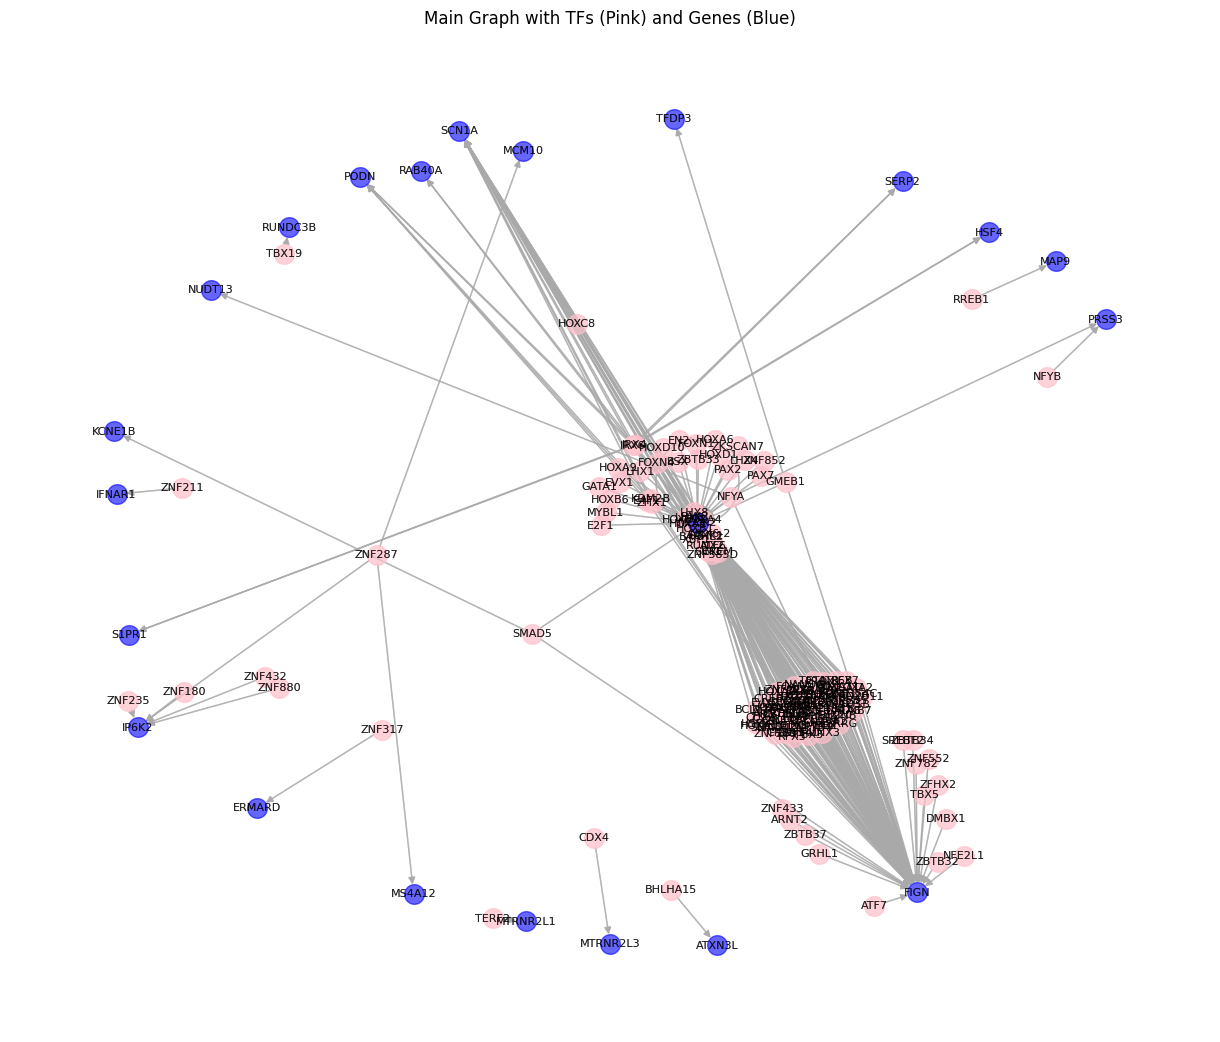

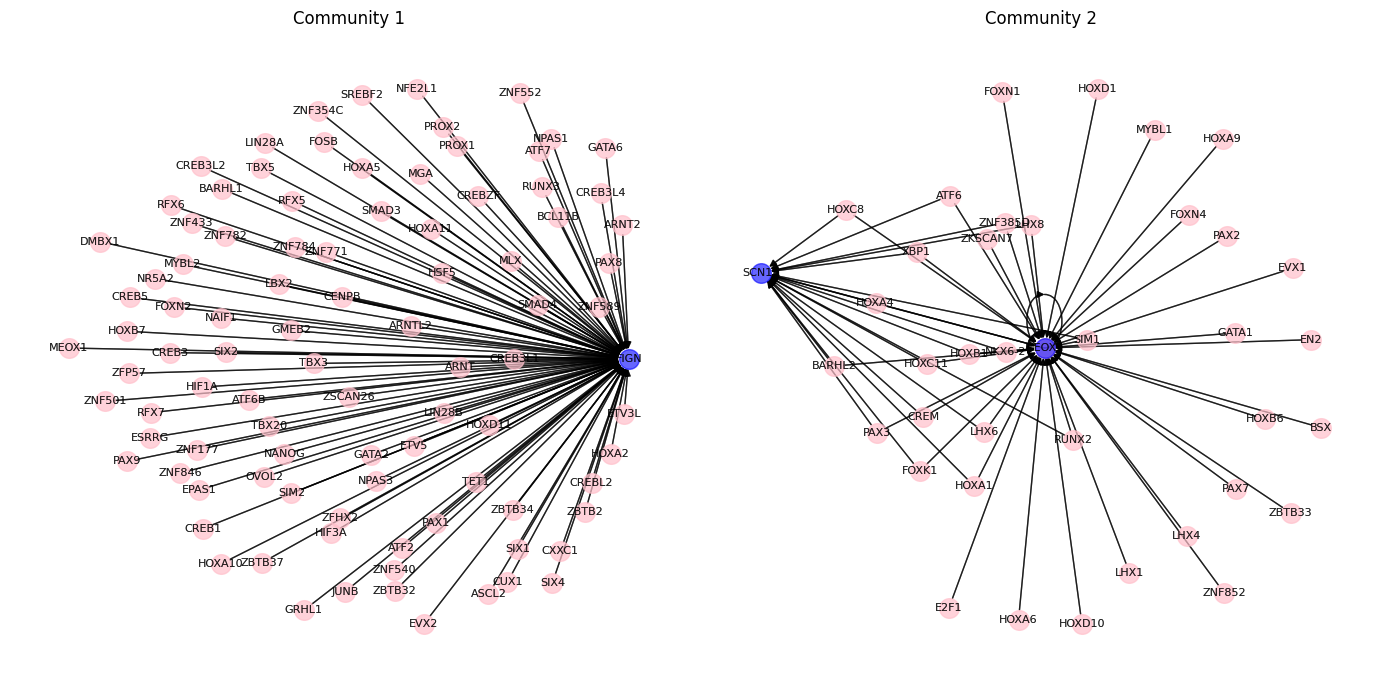

In [70]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import community



# Initialize directed graph for positive interactions
G_positive = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_300_positive_df.iterrows():
    G_positive.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_positive, k=0.8, iterations=100)

# Separate nodes based on Source and Target
source_nodes = set(top_300_positive_df['Source'])
target_nodes = set(top_300_positive_df['Target'])

# Draw the main graph
plt.figure(figsize=(12, 10))
nx.draw(
    G_positive, pos, with_labels=True, node_size=200, nodelist=source_nodes,
    node_color="pink", alpha=0.7, font_size=8, edge_color="darkgrey"
)
nx.draw(
    G_positive, pos, with_labels=True, node_size=200, nodelist=target_nodes,
    node_color="blue", alpha=0.6, font_size=8, edge_color="darkgrey"
)
plt.title("Main Graph with TFs (Pink) and Genes (Blue)")
plt.show()

# Calculate communities
communities = community.greedy_modularity_communities(G_positive)
# Create subplots for communities
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, comm in enumerate(communities[:2]):  # First two communities
    subgraph = G_positive.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, k=0.8)  # Separate layout for each community

    # Separate nodes into TFs and genes for this subgraph
    sub_source_nodes = [node for node in comm if node in source_nodes]
    sub_target_nodes = [node for node in comm if node in target_nodes]

    # Draw source nodes (TFs) in pink
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=200,
        nodelist=sub_source_nodes, node_color="pink", alpha=0.7, font_size=8
    )

    # Draw target nodes (genes) in blue
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=200,
        nodelist=sub_target_nodes, node_color="blue", alpha=0.6, font_size=8
    )

    axes[idx].set_title(f"Community {idx + 1}")

plt.tight_layout()
plt.show()


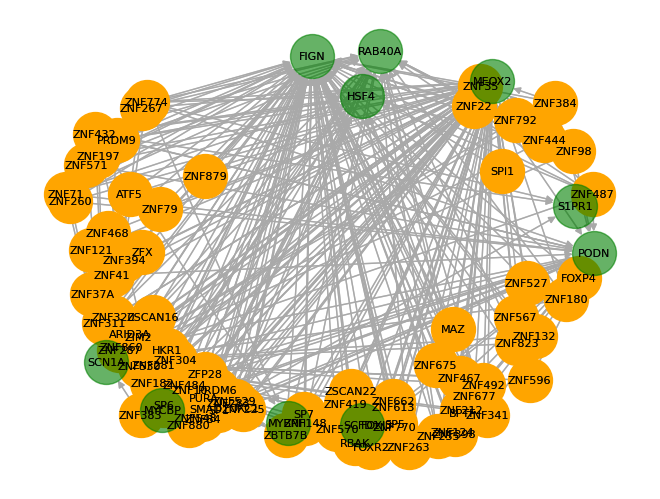

In [71]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


# Initialize directed graph for positive interactions
G_negative = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_300_negative_df.iterrows():
    G_negative.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_negative, k=0.6, iterations=30)

# Separate nodes based on Source and Target
source_nodes = set(top_300_negative_df['Source'])
target_nodes = set(top_300_negative_df['Target'])

# Draw the source nodes in pink
nx.draw(G_negative, pos, with_labels=True, node_size=1000, nodelist=source_nodes, node_color="orange", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G_negative, pos, with_labels=True, node_size=1000, nodelist=target_nodes, node_color="green", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
#edge_labels = nx.get_edge_attributes(G_negative, 'weight')
#nx.draw_networkx_edge_labels(G_negative, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()


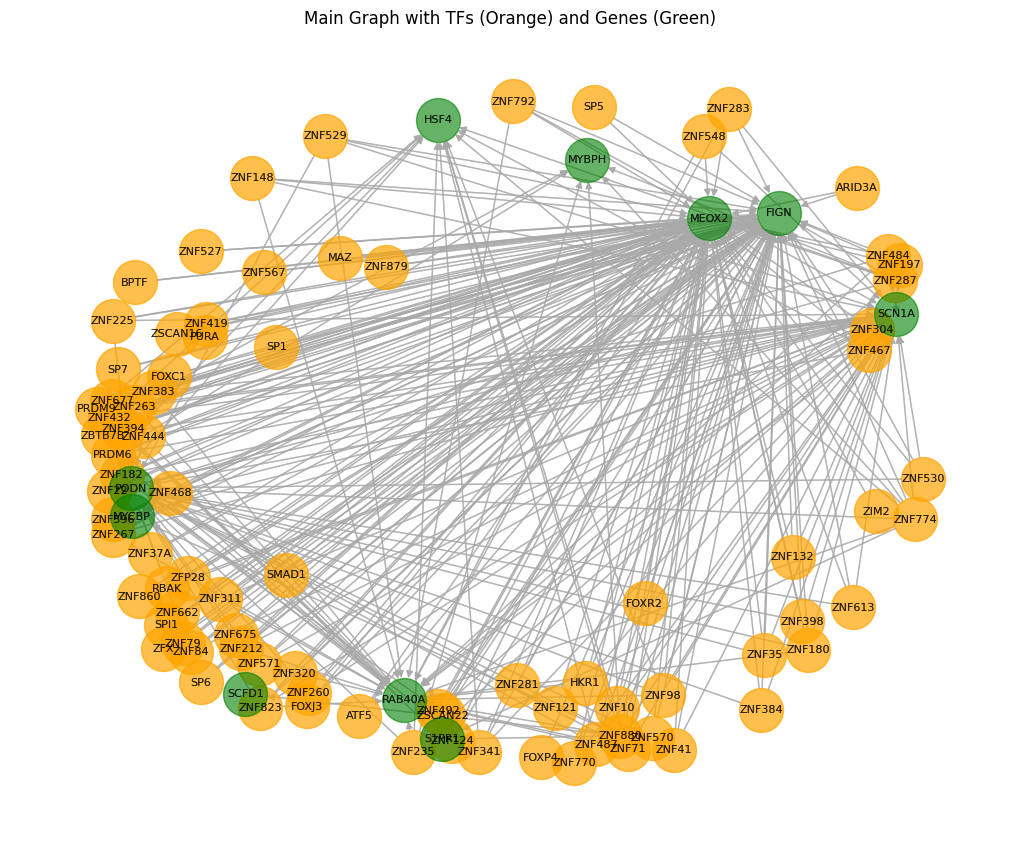

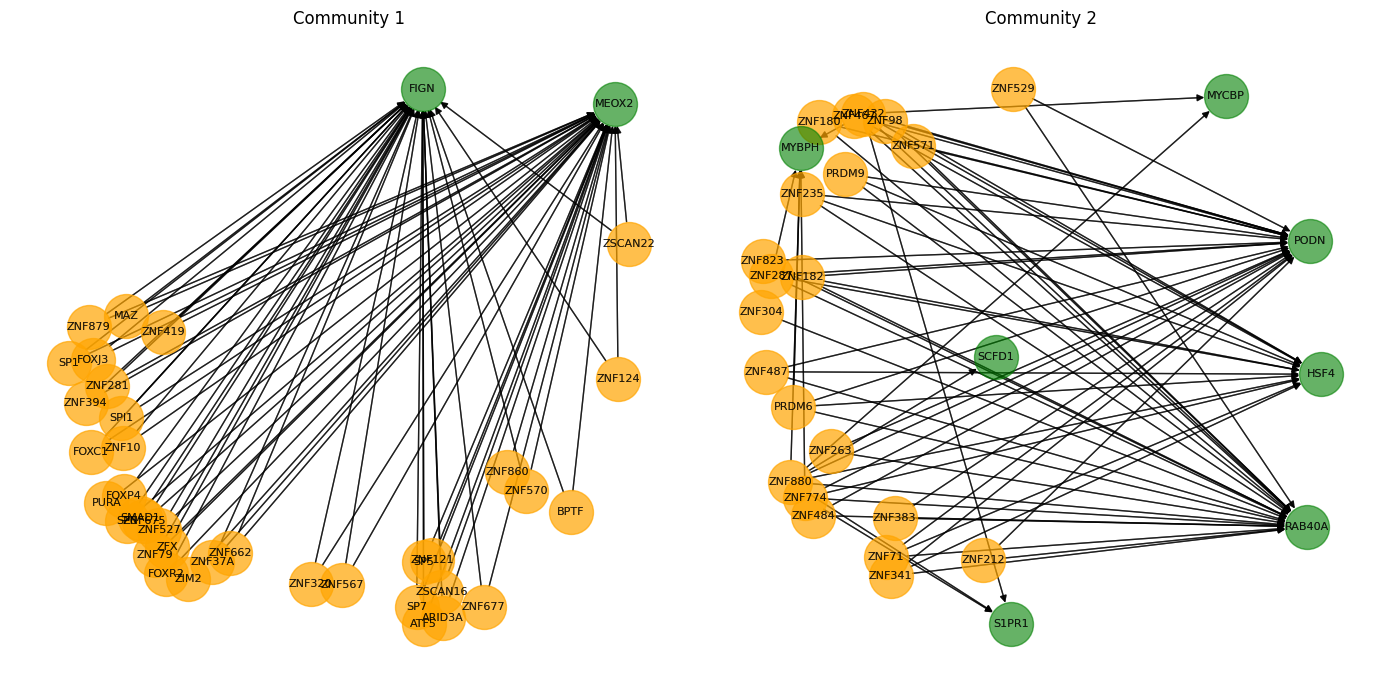

In [72]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import community

# Initialize directed graph for negative interactions
G_negative = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_300_negative_df.iterrows():
    G_negative.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_negative, k=0.6, iterations=30)

# Separate nodes based on Source and Target
source_nodes = set(top_300_negative_df['Source'])
target_nodes = set(top_300_negative_df['Target'])

# Draw the main graph
plt.figure(figsize=(10, 8))
nx.draw(
    G_negative, pos, with_labels=True, node_size=1000, nodelist=source_nodes,
    node_color="orange", alpha=0.7, font_size=8, edge_color="darkgrey"
)
nx.draw(
    G_negative, pos, with_labels=True, node_size=1000, nodelist=target_nodes,
    node_color="green", alpha=0.6, font_size=8, edge_color="darkgrey"
)
plt.title("Main Graph with TFs (Orange) and Genes (Green)")
plt.show()

# Calculate communities for the negative graph
communities_negative = community.greedy_modularity_communities(G_negative)

# Create subplots for communities
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, comm in enumerate(communities_negative[:2]):  # First two communities
    subgraph = G_negative.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, k=0.8)  # Separate layout for each community

    # Separate nodes into TFs and genes for this subgraph
    sub_source_nodes = [node for node in comm if node in source_nodes]
    sub_target_nodes = [node for node in comm if node in target_nodes]

    # Draw source nodes (TFs) in orange
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=1000,
        nodelist=sub_source_nodes, node_color="orange", alpha=0.7, font_size=8
    )

    # Draw target nodes (genes) in green
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=1000,
        nodelist=sub_target_nodes, node_color="green", alpha=0.6, font_size=8
    )

    axes[idx].set_title(f"Community {idx + 1}")

plt.tight_layout()
plt.show()


I have attempted using Kamada and Planar layouts and it did not yield any explainable or reasonable plots

In [73]:
#Save the graph in formats like GraphML or GEXF for visualization in tools like Gephi.
nx.write_graphml(G_positive, "positive_interactions.graphml")
nx.write_graphml(G_negative, "negative_interactions.graphml")

# Let's install PyGPS (suggested by Ortega) and use it for signal processing:

In [74]:
pip install pygsp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.8 MB/s eta 0:00:00


# **1. Convert NetworkX Graph to PyGSP Graph**

In [75]:
#I decided to use PyGSP package so few adjustments will be required
import networkx as nx
import pygsp as pg
from networkx import to_scipy_sparse_array

# Extract adjacency matrix from NetworkX graph
# Extract adjacency matrix from NetworkX graph as a sparse array
G_positive.remove_edges_from(nx.selfloop_edges(G_positive))##### remove the loop here so now I have 299 edges
adjacency_matrix_pos = to_scipy_sparse_array(G_positive, weight=" Edge weight")

# Create PyGSP graph
gsp_graph_pos= pg.graphs.Graph(adjacency_matrix_pos)

# Display basic graph info
print(f"PyGSP Graph Positive with {gsp_graph_pos.N} nodes and {gsp_graph_pos.Ne} edges.")


PyGSP Graph Positive with 174 nodes and 299 edges.


In [76]:
# Extract adjacency matrix from NetworkX graph for Negative graph
# Extract adjacency matrix from NetworkX graph as a sparse array
adjacency_matrix_neg = to_scipy_sparse_array(G_negative, weight=" Edge weight")

# Create PyGSP graph
gsp_graph_neg= pg.graphs.Graph(adjacency_matrix_neg)

# Display basic graph info
print(f"PyGSP Graph Negative with {gsp_graph_neg.N} nodes and {gsp_graph_neg.Ne} edges.")


PyGSP Graph Negative with 95 nodes and 300 edges.


since our positive graph has loops, i.e. gene strongly interacting with itself (may be acts as a dimer?), I decided to remove that loop for further analysis.


---




# **2.Compute the Laplacian Matrix**


In [77]:
# Compute Laplacian (default is combinatorial)
gsp_graph_pos.compute_laplacian(lap_type="combinatorial")
laplacian = gsp_graph_pos.L

print("Laplacian Matrix Pos:")
print(laplacian.toarray())  # Display dense matrix for small graphs


Laplacian Matrix Pos:
[[ 4.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5 63.5 -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  4.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.5  0.   0. ]
 [ 0.   0.   0.  ...  0.   0.5 -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  0.5]]


In [78]:
# Compute Laplacian (default is combinatorial)
gsp_graph_neg.compute_laplacian(lap_type="combinatorial")
laplacian = gsp_graph_neg.L

print("Laplacian Matrix Neg:")
print(laplacian.toarray())  # Display dense matrix for small graphs


Laplacian Matrix Neg:
[[ 3.5 -0.5  0.  ...  0.   0.   0. ]
 [-0.5 39.5 -0.5 ... -0.5  0.   0. ]
 [ 0.  -0.5  4.5 ...  0.  -0.5  0. ]
 ...
 [ 0.  -0.5  0.  ...  0.5  0.   0. ]
 [ 0.   0.  -0.5 ...  0.   1.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0.5]]


# 3. Assign Graph Signal
Assign RNa-seq data as the graph signal

In [79]:
import pandas as pd

# Load RNA-seq data
rna_seq_data = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/MCF_RNAseq_countsGSE208731.csv")  # Replace with your RNA-seq file
# Columns: gene, expression

# Extract genes from graphs
positive_genes = set(G_positive.nodes)
negative_genes = set(G_negative.nodes)
all_genes_in_graph = positive_genes.union(negative_genes)

# Filter RNA-seq data to include only relevant genes
filtered_rna_seq_data = rna_seq_data[rna_seq_data['Gene'].isin(all_genes_in_graph)]

# Verify the alignment
missing_genes = all_genes_in_graph - set(filtered_rna_seq_data['Gene'])
if missing_genes:
    print(f"Warning: The following genes are missing in the RNA-seq data: {missing_genes}")
else:
    print("All graph genes have corresponding RNA-seq data.")



All graph genes have corresponding RNA-seq data.


In [80]:
#average the expression data based on experimental coditions
import pandas as pd



# Averaging specific column groups and renaming them
column_groups = {
    "MCF7_2D_exp1": [1, 2, 3],      # Columns 1, 2, 3
    "MCF7_3D_exp1": [4, 5, 6],      # Columns 4, 5, 6
    "MCF7_2D_exp2": [7, 8, 9, 10, 11, 12],  # Columns 7 to 12
    "MCF7_3D_exp2": [13, 14, 15, 16, 17, 18]  # Columns 13 to 18
}

# Initialize a new DataFrame with the 'gene' column
averaged_data = filtered_rna_seq_data[['Gene']].copy()

# Compute averages for each group and add to the new DataFrame
for new_column, indices in column_groups.items():
    averaged_data[new_column] = rna_seq_data.iloc[:, indices].mean(axis=1).round(2)

# Save or inspect the resulting DataFrame
print(averaged_data.head())
averaged_data.to_csv("averaged_rna_seq_data.csv", index=False)


        Gene  MCF7_2D_exp1  MCF7_3D_exp1  MCF7_2D_exp2  MCF7_3D_exp2
2625  ARID3A       1159.33        662.67        568.17        355.17
2707    ARNT       5967.00       5173.33       2463.67       2109.67
2708   ARNT2       1991.67       1193.00       1007.00        791.83
2710  ARNTL2       1021.67        460.67        647.50        318.00
2786   ASCL2        825.33        874.33        490.33        680.33


In [81]:
import networkx as nx
import pandas as pd

#Load RNA-seq data
averaged_rna_seq_data = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/averaged_rna_seq_data.csv")  # Replace with your RNA-seq file



# Ensure the RNA-seq data has a 'Gene' column and averaged columns (e.g., MCF7_2D_exp1, etc.)
# Create a mapping of genes to expression values for each condition

# Extract nodes for G_positive and G_negative
positive_genes = set(G_positive.nodes)
negative_genes = set(G_negative.nodes)

# Filter RNA-seq data for genes in G_positive and G_negative
positive_rna_seq = averaged_rna_seq_data[averaged_rna_seq_data['Gene'].isin(positive_genes)]
negative_rna_seq = averaged_rna_seq_data[averaged_rna_seq_data['Gene'].isin(negative_genes)]

# Create dictionaries for each graph and each condition
expression_dicts_positive = {
    condition: dict(zip(positive_rna_seq['Gene'], positive_rna_seq[condition]))
    for condition in averaged_rna_seq_data.columns[1:]  # Skip 'gene' column
}

expression_dicts_negative = {
    condition: dict(zip(negative_rna_seq['Gene'], negative_rna_seq[condition]))
    for condition in averaged_rna_seq_data.columns[1:]  # Skip 'gene' column
}

# Assign expression values to nodes in G_positive for a specific condition (example: MCF7_2D_exp1)
selected_condition = "MCF7_2D_exp1"  # Replace with the condition you want to use
nx.set_node_attributes(G_positive, expression_dicts_positive[selected_condition], name='expression')
nx.set_node_attributes(G_negative, expression_dicts_negative[selected_condition], name='expression')

# Verify attributes are set correctly
print("G_positive node attributes:")
for node, data in G_positive.nodes(data=True):
    print(node, data)

print("\nG_negative node attributes:")
for node, data in G_negative.nodes(data=True):
    print(node, data)


G_positive node attributes:
IRX6 {'expression': 9.67}
MEOX2 {'expression': 0.33}
IRX4 {'expression': 175.33}
FIGN {'expression': 632.33}
ZHX1 {'expression': 2894.0}
KDM2B {'expression': 2197.33}
E4F1 {'expression': 488.33}
ZNF385D {'expression': 0.33}
SCN1A {'expression': 2.33}
SIM1 {'expression': 194.33}
GMEB1 {'expression': 812.67}
TFDP3 {'expression': 0.33}
NPAS1 {'expression': 14.0}
NPAS3 {'expression': 164.67}
CREM {'expression': 438.0}
SIM2 {'expression': 385.33}
ATF6 {'expression': 2349.67}
NAIF1 {'expression': 390.67}
HIF3A {'expression': 15.33}
EPAS1 {'expression': 1982.0}
SIX2 {'expression': 412.33}
FOXK1 {'expression': 1260.67}
BARHL2 {'expression': 0.0}
GMEB2 {'expression': 1447.0}
PODN {'expression': 1.0}
OVOL2 {'expression': 164.33}
ZNF784 {'expression': 208.33}
ZBTB2 {'expression': 2408.33}
RUNX2 {'expression': 407.67}
XBP1 {'expression': 24545.33}
SIX4 {'expression': 1838.0}
MYBL2 {'expression': 19598.33}
ZNF846 {'expression': 67.33}
NR5A2 {'expression': 132.67}
TERF2 {

In [82]:
# --- Convert to PyGSP ---
# Convert NetworkX graphs to PyGSP format
adjacency_matrix_positive = to_scipy_sparse_array(G_positive, weight=" Edge weight")
adjacency_matrix_negative = to_scipy_sparse_array(G_negative, weight="Edge weight")

gsp_graph_positive = pg.graphs.Graph(adjacency_matrix_positive)
gsp_graph_negative = pg.graphs.Graph(adjacency_matrix_negative)

# Extract RNA-seq expression as signal vectors for PyGSP
signal_positive = np.array([data['expression'] for _, data in G_positive.nodes(data=True)])
signal_negative = np.array([data['expression'] for _, data in G_negative.nodes(data=True)])

# Ensure signals match graph sizes
assert len(signal_positive) == gsp_graph_positive.N, "Positive graph signal length mismatch!"
assert len(signal_negative) == gsp_graph_negative.N, "Negative graph signal length mismatch!"

# Display signals
print("\nSignal (Positive Graph):", signal_positive[:5])  # Display first 5 for brevity
print("\nSignal (Negative Graph):", signal_negative[:5])  # Display first 5 for brevity


Signal (Positive Graph): [9.6700e+00 3.3000e-01 1.7533e+02 6.3233e+02 2.8940e+03]

Signal (Negative Graph): [2.7333e+02 6.3233e+02 2.4800e+02 3.3000e-01 1.3900e+02]


==========================================================================
Steps to Continue

--Compute Laplacians

Calculate the Laplacian matrices for both graphs using PyGSP.


--Analyze Signal Variation

Measure the variation of RNA-seq signals on the graph using
𝑆(𝑓)=𝑓𝑇𝐿𝑓
S(f)=**fTLf**.

--Optional: Visualize Signal Distribution

Plot the RNA-seq signals or their variations.


## 4 **Compute Laplacians**

In [83]:
# Compute Laplacians for positive and negative graphs
gsp_graph_positive.compute_laplacian(lap_type="combinatorial")
gsp_graph_negative.compute_laplacian(lap_type="combinatorial")

# Access Laplacian matrices
laplacian_positive = gsp_graph_positive.L
laplacian_negative = gsp_graph_negative.L

print("\nLaplacian Matrix (Positive Graph):")
print(laplacian_positive.toarray()[:5, :5])  # Display first 5x5 for brevity

print("\nLaplacian Matrix (Negative Graph):")
print(laplacian_negative.toarray()[:5, :5])  # Display first 5x5 for brevity



Laplacian Matrix (Positive Graph):
[[ 4.  -0.5  0.  -0.5  0. ]
 [-0.5 63.5 -0.5 -0.5 -0.5]
 [ 0.  -0.5  4.  -0.5  0. ]
 [-0.5 -0.5 -0.5 59.5 -0.5]
 [ 0.  -0.5  0.  -0.5  2. ]]

Laplacian Matrix (Negative Graph):
[[ 3.5 -0.5  0.  -0.5  0. ]
 [-0.5 39.5 -0.5  0.  -0.5]
 [ 0.  -0.5  4.5 -0.5  0. ]
 [-0.5  0.  -0.5 41.5 -0.5]
 [ 0.  -0.5  0.  -0.5  3.5]]


# **5. Analyze Signal Variation**

In [84]:
# Signal variation for positive and negative graphs
signal_variation_positive = signal_positive.T @ laplacian_positive @ signal_positive
signal_variation_negative = signal_negative.T @ laplacian_negative @ signal_negative

print(f"\nSignal Variation (Positive Graph): {signal_variation_positive}")
print(f"Signal Variation (Negative Graph): {signal_variation_negative}")



Signal Variation (Positive Graph): 2225574813.69935
Signal Variation (Negative Graph): 807433791.72445


# 6.**Optional: Visualize Signal Distribution**

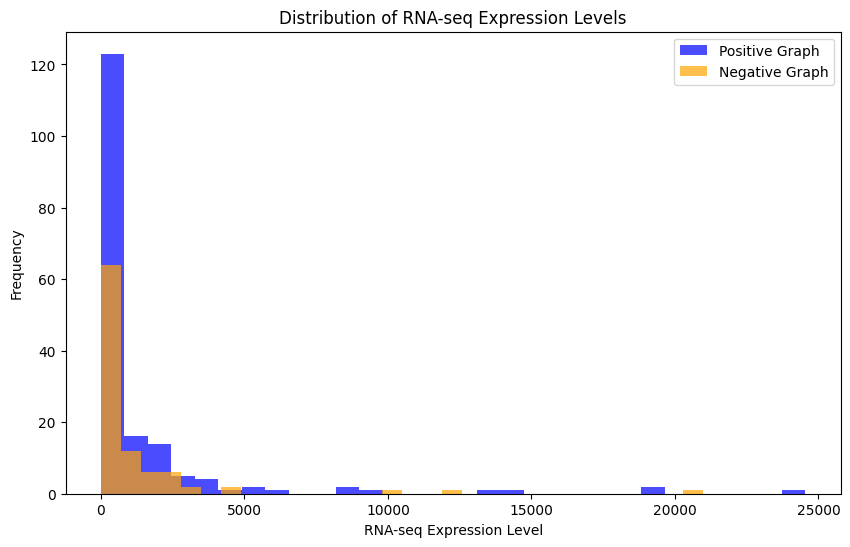

In [85]:
import matplotlib.pyplot as plt

# Plot RNA-seq signals for positive graph
plt.figure(figsize=(10, 6))
plt.hist(signal_positive, bins=30, alpha=0.7, label="Positive Graph", color='blue')
plt.hist(signal_negative, bins=30, alpha=0.7, label="Negative Graph", color='orange')
plt.xlabel("RNA-seq Expression Level")
plt.ylabel("Frequency")
plt.title("Distribution of RNA-seq Expression Levels")
plt.legend()
plt.show()


# Next Steps
Clustering:
Perform spectral clustering using the eigenvalues and eigenvectors of the Laplacians.

Filtering:
Apply graph filters to smooth or enhance RNA-seq signals on the graphs.

Comparative Analysis:
Compare the results from the positive and negative graphs to identify key genes or regulatory patterns.

# **1. Clustering**
We’ll now perform spectral clustering using the eigenvalues and eigenvectors of the Laplacian matrices for the positive and negative graphs. This helps group nodes (genes) into clusters based on their connectivity patterns and RNA-seq signal variations.

Steps for Spectral Clustering:

A) Compute Eigenvalues and Eigenvectors

Use PyGSP to extract the Fourier basis (eigenvectors of the Laplacian) and corresponding eigenvalues.

B) Cluster Nodes

Use the eigenvectors corresponding to the smallest non-zero eigenvalues for clustering (spectral embedding).

C) Visualize Clustering

Optionally visualize clusters for insights.


In [86]:
#Compute Eigenvalues and Eigenvectors

# Compute Fourier basis (eigenvalues and eigenvectors) for both graphs
gsp_graph_positive.compute_fourier_basis()
gsp_graph_negative.compute_fourier_basis()

eigvals_positive = gsp_graph_positive.e  # Eigenvalues
eigvecs_positive = gsp_graph_positive.U  # Eigenvectors

eigvals_negative = gsp_graph_negative.e  # Eigenvalues
eigvecs_negative = gsp_graph_negative.U  # Eigenvectors

# Display smallest eigenvalues (skip 0 for connected components)
print("\nEigenvalues (Positive Graph):", eigvals_positive[:10])  # First 10 for brevity
print("\nEigenvalues (Negative Graph):", eigvals_negative[:10])  # First 10 for brevity



Eigenvalues (Positive Graph): [ 0.00000000e+00 -9.25500985e-16 -7.73542735e-16 -9.66928418e-17
 -1.70860733e-25 -9.00674574e-31  0.00000000e+00  2.71270427e-17
  3.86771367e-16  1.27734221e-01]

Eigenvalues (Negative Graph): [0.         0.43009212 0.48230071 0.5        0.5        0.5
 0.5        0.51627036 0.80545375 0.95184983]


In [87]:
#Perform Spectral Clustering
#Use the eigenvectors associated with the smallest non-zero eigenvalues to cluster the nodes (genes).

from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Use first few eigenvectors (excluding the first constant eigenvector)
clusters_positive = KMeans(n_clusters=num_clusters).fit_predict(eigvecs_positive[:, 1:num_clusters+1])
clusters_negative = KMeans(n_clusters=num_clusters).fit_predict(eigvecs_negative[:, 1:num_clusters+1])

print("\nClusters (Positive Graph):", clusters_positive[:10])  # First 10 clusters for brevity
print("\nClusters (Negative Graph):", clusters_negative[:10])  # First 10 clusters for brevity)



Clusters (Positive Graph): [0 0 0 0 0 0 0 0 0 0]

Clusters (Negative Graph): [0 0 0 0 0 0 0 0 0 0]


In [88]:
#Assign Clusters to Nodes
#Assign the cluster labels to nodes in the NetworkX graph for further exploration.

# Assign cluster labels as node attributes
nx.set_node_attributes(G_positive, dict(zip(G_positive.nodes, clusters_positive)), "cluster")
nx.set_node_attributes(G_negative, dict(zip(G_negative.nodes, clusters_negative)), "cluster")

# Verify node clusters
print("\nG_positive Clusters:")
for node, data in list(G_positive.nodes(data=True))[:5]:  # First 5 for brevity
    print(node, data)

print("\nG_negative Clusters:")
for node, data in list(G_negative.nodes(data=True))[:5]:  # First 5 for brevity
    print(node, data)





G_positive Clusters:
IRX6 {'expression': 9.67, 'cluster': 0}
MEOX2 {'expression': 0.33, 'cluster': 0}
IRX4 {'expression': 175.33, 'cluster': 0}
FIGN {'expression': 632.33, 'cluster': 0}
ZHX1 {'expression': 2894.0, 'cluster': 0}

G_negative Clusters:
ZNF287 {'expression': 273.33, 'cluster': 0}
FIGN {'expression': 632.33, 'cluster': 0}
ZNF432 {'expression': 248.0, 'cluster': 0}
MEOX2 {'expression': 0.33, 'cluster': 0}
ZNF235 {'expression': 139.0, 'cluster': 0}


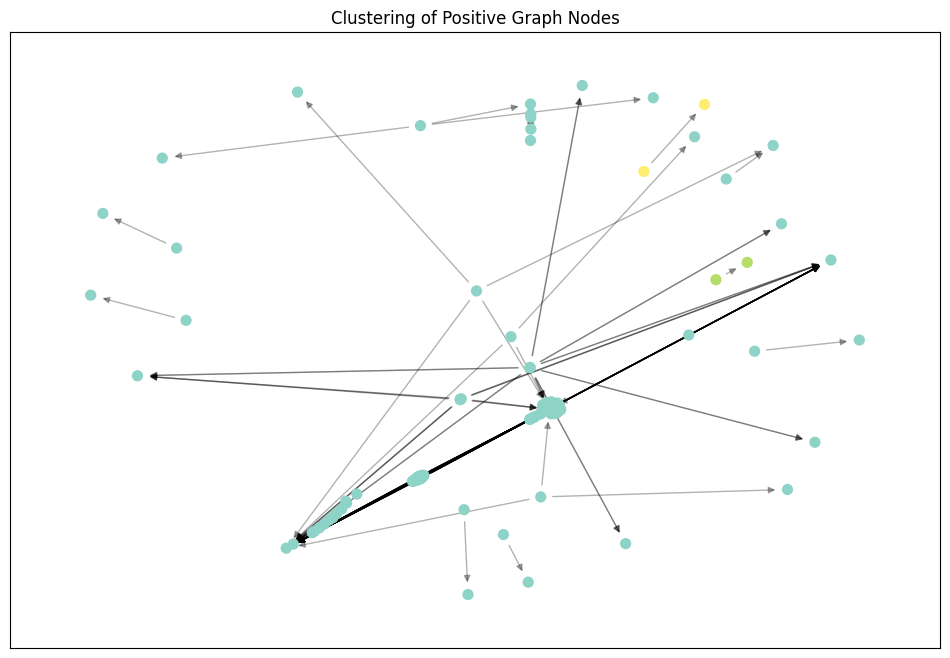

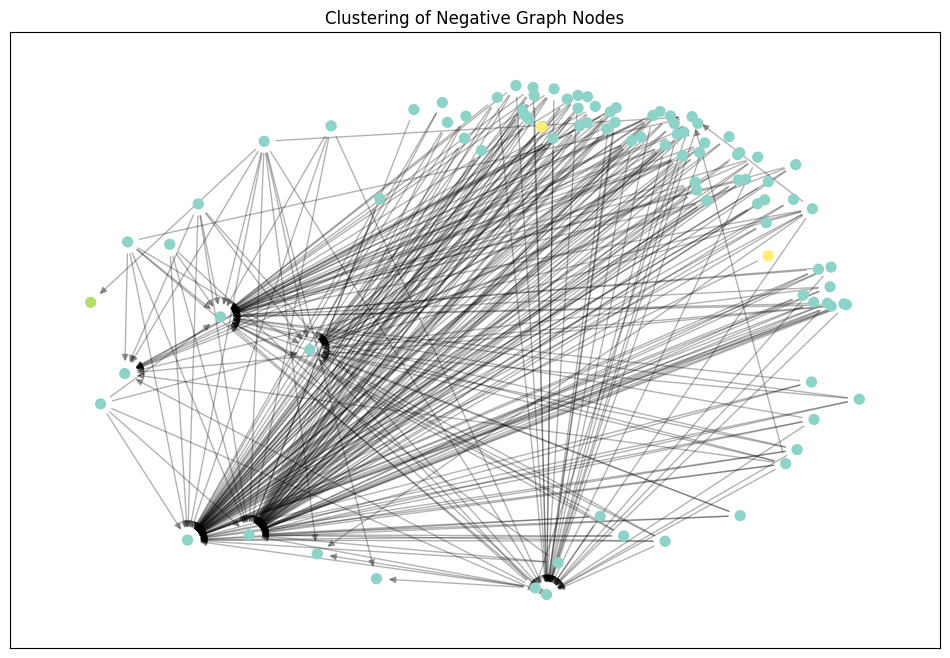

In [89]:
#Visualize Clustering Results
#(Optional) You can visualize the clustering using a library like Matplotlib.

import matplotlib.pyplot as plt
import networkx as nx

# Visualize positive graph clustering
pos = nx.spring_layout(G_positive)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_positive, pos, node_size=50, node_color=clusters_positive, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_positive, pos, alpha=0.3)
plt.title("Clustering of Positive Graph Nodes")
plt.show()

# Visualize negative graph clustering
pos = nx.spring_layout(G_negative)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_negative, pos, node_size=50, node_color=clusters_negative, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_negative, pos, alpha=0.3)
plt.title("Clustering of Negative Graph Nodes")
plt.show()


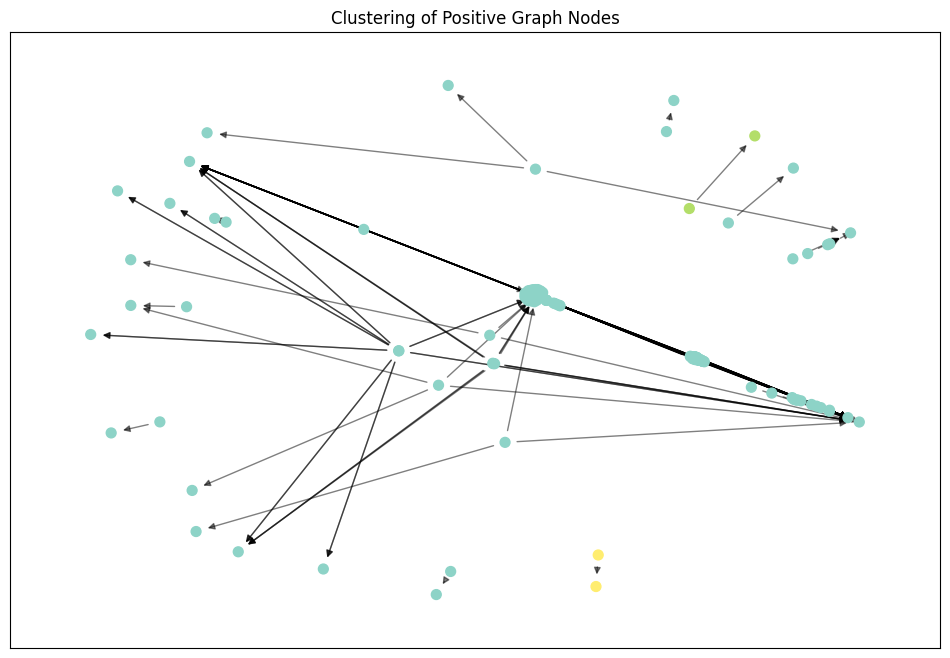

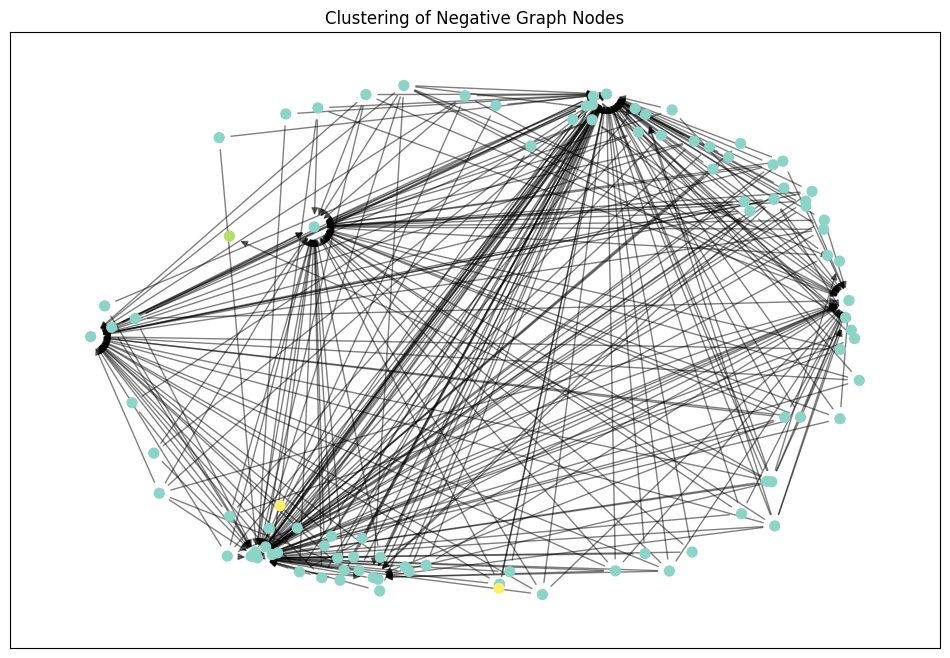

In [90]:
#Visualize Clustering Results
#(Optional) You can visualize the clustering using a library like Matplotlib.

import matplotlib.pyplot as plt
import networkx as nx

# Visualize positive graph clustering
pos = nx.spring_layout(G_positive)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_positive, pos, node_size=50, node_color=clusters_positive, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_positive, pos, alpha=0.5)
plt.title("Clustering of Positive Graph Nodes")
plt.show()

# Visualize negative graph clustering
pos = nx.spring_layout(G_negative)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_negative, pos, node_size=50, node_color=clusters_negative, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_negative, pos, alpha=0.5)
plt.title("Clustering of Negative Graph Nodes")
plt.show()


# Lets try to identify the positive graph with stronger interaction hub depicted with thicker edges

# 1. Identify the Hub Node
# The hub node is likely the node with the highest degree or the strongest total edge weight. You can calculate these metrics:

# Degree Centrality (Number of Connections)

In [91]:
# Get degree centrality for G_positive
degree_centrality = nx.degree_centrality(G_positive)

# Sort nodes by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top nodes
print("Top Nodes by Degree Centrality (Positive Graph):")
for node, centrality in sorted_degree[:5]:  # Top 5 nodes
    print(f"Node: {node}, Degree Centrality: {centrality}")


Top Nodes by Degree Centrality (Positive Graph):
Node: MEOX2, Degree Centrality: 0.7341040462427745
Node: FIGN, Degree Centrality: 0.6878612716763005
Node: SCN1A, Degree Centrality: 0.1329479768786127
Node: IRX6, Degree Centrality: 0.046242774566473986
Node: IRX4, Degree Centrality: 0.046242774566473986


In [92]:
# Compute strength (sum of edge weights) for each node
strength = {node: sum(data["weight"] for _, _, data in G_positive.edges(node, data=True)) for node in G_positive.nodes()}

# Sort nodes by strength
sorted_strength = sorted(strength.items(), key=lambda x: x[1], reverse=True)

# Display the top nodes
print("\nTop Nodes by Strength (Edge Weights, Positive Graph):")
for node, weight in sorted_strength[:5]:  # Top 5 nodes
    print(f"Node: {node}, Strength (Sum of Weights): {weight}")



Top Nodes by Strength (Edge Weights, Positive Graph):
Node: IRX6, Strength (Sum of Weights): 330.27746628000006
Node: IRX4, Strength (Sum of Weights): 328.70313557
Node: ZHX1, Strength (Sum of Weights): 187.17302318999998
Node: KDM2B, Strength (Sum of Weights): 161.2325386
Node: E4F1, Strength (Sum of Weights): 154.17396538


# **2. Identify Genes and TFs Connected to the Hub**
# Once you identify the hub node, find all nodes connected to it and analyze their edge weights:

In [93]:
# Get the top hub node (by strength or degree centrality)
top_hub_node = sorted_strength[0][0]  # Replace with your preferred metric

# Get neighbors (connected nodes) of the hub
neighbors = G_positive[top_hub_node]

print(f"\nNeighbors of Hub Node ({top_hub_node}):")
for neighbor, edge_data in neighbors.items():
    print(f"Connected Node: {neighbor}, Edge Weight: {edge_data['weight']}")



Neighbors of Hub Node (IRX6):
Connected Node: MEOX2, Edge Weight: 64.13006049
Connected Node: FIGN, Edge Weight: 60.46431409
Connected Node: SCN1A, Edge Weight: 44.4363919
Connected Node: PODN, Edge Weight: 39.59363071
Connected Node: RAB40A, Edge Weight: 35.70807572
Connected Node: HSF4, Edge Weight: 29.48778339
Connected Node: S1PR1, Edge Weight: 28.66082924
Connected Node: SERP2, Edge Weight: 27.79638074


In [94]:
top_hub_node = sorted_degree[0][0]  # Use degree centrality to select the hub
# Get neighbors (connected nodes) of the hub
neighbors = G_positive[top_hub_node]

print(f"\nNeighbors of Hub Node ({top_hub_node}):")
for neighbor, edge_data in neighbors.items():
    print(f"Connected Node: {neighbor}, Edge Weight: {edge_data['weight']}")


Neighbors of Hub Node (MEOX2):
Connected Node: FIGN, Edge Weight: 31.6292195
Connected Node: SCN1A, Edge Weight: 27.6255235


# **3. Visualize the Hub and Its Connections**
# You can highlight the hub and its neighbors in a graph visualization:

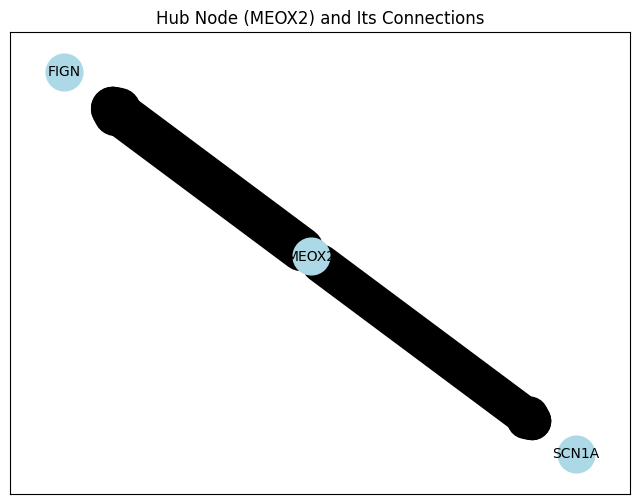

In [95]:
import matplotlib.pyplot as plt

# Get the subgraph for the hub and its neighbors
hub_subgraph = G_positive.subgraph([top_hub_node] + list(neighbors.keys()))

# Visualize the subgraph
pos = nx.spring_layout(hub_subgraph)  # Layout for visualization
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(hub_subgraph, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(hub_subgraph, pos, width=[d["weight"] for (_, _, d) in hub_subgraph.edges(data=True)])
nx.draw_networkx_labels(hub_subgraph, pos, font_size=10)
plt.title(f"Hub Node ({top_hub_node}) and Its Connections")
plt.show()


# **4. Export Hub Connections for Further Analysis**
# If you want to analyze this data outside Python, export the hub’s connections to a file:

In [96]:
import pandas as pd

# Create a DataFrame for the hub's connections
hub_connections = pd.DataFrame({
    "TF": [top_hub_node] * len(neighbors),
    "Gene": list(neighbors.keys()),
    "Edge Weight": [data["weight"] for _, data in neighbors.items()]
})

# Save to CSV
hub_connections.to_csv("hub_connections_positive.csv", index=False)
print("\nHub connections exported to 'hub_connections_positive.csv'")



Hub connections exported to 'hub_connections_positive.csv'
